In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, BatchNormalization, LeakyReLU
from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow import set_random_seed
import tensorflow as tf
from skimage.io import imread
from PIL import Image
from skimage.transform import resize
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import *
import image_utils as iu


In [2]:
def get_encoding():
    i = 0
    encoding_dict = dict()
    decoding_dict = dict()
    max_val = 6
    for r in range(max_val):
        for g in range(max_val):
            for b in range(max_val):
                encoding_dict[(r, g, b)] = i
                decoding_dict[i] = (r, g, b)
                i +=1
    return encoding_dict, decoding_dict


In [4]:
encoding_dict, decoding_dict = get_encoding()

In [5]:
def get_val_code(value):
    new_val = value
    if new_val <= 42:
        return 0
    elif new_val > 42 and new_val <= 84:
        return 1
    elif new_val > 84 and new_val <= 126:
        return 2
    elif new_val > 126 and new_val <= 168:
        return 3
    elif new_val > 168 and new_val <= 210:
        return 4
    elif new_val > 210:
        return 5
    
def encode_rgb_image(np_image):
    new_image = [None] * np_image.shape[0]
    for ro in range(np_image.shape[0]):
        row = np_image[ro]
        new_row = [None] * row.shape[0]
        for p in range(row.shape[0]):
            pix = row[p]
            r, g, b = pix[0], pix[1], pix[2]
            r, g, b = get_val_code(r), get_val_code(g), get_val_code(b)
            encoding = encoding_dict[(r, g, b)]
            new_row[p] = encoding
        new_image[ro] = new_row
    return np.array(new_image)

    # new_image = []
    # for row in np_image:
    #     new_row = []
    #     for pix in row:
    #         r, g, b = pix[0], pix[1], pix[2]
    #         r, g, b  = get_val_code(r), get_val_code(g), get_val_code(b)
    #         encoding = encoding_dict[(r, g, b)]
    #         new_row.append(encoding)
    #     new_image.append(new_row)
    # return np.array(new_image)


In [14]:
def get_decoded_val(value):
    if value == 0:
        return 0
    elif value == 1:
        return 43
    elif value == 2:
        return 85
    elif value == 3:
        return 127
    elif value == 4:
        return 169
    elif value == 5:
        return 211
    
def decode_image(image):
    new_image = [None] * image.shape[0]
    for ro in range(image.shape[0]):
        row = image[ro]
        new_row = [None] * row.shape[0]
        for p in range(row.shape[0]):
            e = row[p]
            (r, g, b) = decoding_dict[e]
            # print(decoding_dict[e])
            r, g, b = get_decoded_val(r), get_decoded_val(g), get_decoded_val(b)
            new_row[p] = [r,g,b]
        new_image[ro] = new_row
    return np.array(new_image) # .astype(np.uint8)


In [ ]:
arr = []
arr.ca

In [ ]:
t = '0-42, 43-84, 85-126, 127-168, 169-210, 211-252'

In [7]:
test_image = iu.read_image(
    '/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/deep-compression/data/room/IMG_20220423_104257_044.jpg', 'RGB')


In [8]:
test_image = np.asarray(test_image)
test_image

array([[[182, 184, 179],
        [180, 182, 177],
        [180, 182, 177],
        ...,
        [149, 159, 150],
        [151, 161, 152],
        [149, 159, 150]],

       [[181, 183, 178],
        [181, 183, 178],
        [181, 183, 178],
        ...,
        [153, 163, 154],
        [152, 162, 153],
        [150, 160, 151]],

       [[179, 181, 176],
        [180, 182, 177],
        [181, 183, 178],
        ...,
        [154, 164, 155],
        [152, 162, 153],
        [150, 160, 151]],

       ...,

       [[ 51,  62,  64],
        [ 47,  58,  60],
        [ 47,  58,  60],
        ...,
        [174, 168, 144],
        [173, 167, 143],
        [174, 168, 144]],

       [[ 51,  62,  64],
        [ 50,  61,  63],
        [ 50,  61,  65],
        ...,
        [173, 167, 143],
        [175, 169, 145],
        [177, 171, 147]],

       [[ 49,  60,  62],
        [ 49,  60,  62],
        [ 49,  60,  64],
        ...,
        [171, 165, 141],
        [174, 168, 144],
        [177, 171, 147]]

In [9]:
test_image = encode_rgb_image(test_image)
test_image

array([[172, 172, 172, ..., 129, 129, 129],
       [172, 172, 172, ..., 129, 129, 129],
       [172, 172, 172, ..., 129, 129, 129],
       ...,
       [ 43,  43,  43, ..., 165, 165, 165],
       [ 43,  43,  43, ..., 165, 171, 171],
       [ 43,  43,  43, ..., 165, 165, 171]])

In [10]:
test_image.shape

(2976, 3968)

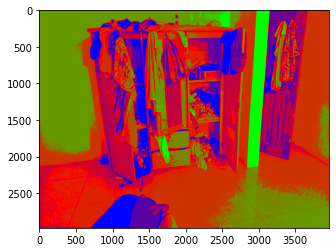

In [11]:
iu.display_image(test_image)

In [12]:
test_image = test_image.astype(np.uint8)


In [40]:
ti = test_image.reshape(1440, 1440, 1)

In [41]:
ti

array([[[172],
        [172],
        [172],
        ...,
        [ 86],
        [ 86],
        [129]],

       [[172],
        [172],
        [172],
        ...,
        [129],
        [ 86],
        [ 86]],

       [[172],
        [172],
        [172],
        ...,
        [129],
        [129],
        [129]],

       ...,

       [[172],
        [172],
        [172],
        ...,
        [ 43],
        [ 43],
        [ 43]],

       [[172],
        [172],
        [172],
        ...,
        [ 43],
        [ 43],
        [ 43]],

       [[172],
        [172],
        [172],
        ...,
        [ 43],
        [ 43],
        [ 43]]])

In [43]:
test_image.min()

0

In [61]:
im = Image.fromarray(test_image)
im.save('room_encoded.jpg')

In [15]:
dec = decode_image(test_image)
dec

array([[[169, 169, 169],
        [169, 169, 169],
        [169, 169, 169],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[169, 169, 169],
        [169, 169, 169],
        [169, 169, 169],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[169, 169, 169],
        [169, 169, 169],
        [169, 169, 169],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       ...,

       [[ 43,  43,  43],
        [ 43,  43,  43],
        [ 43,  43,  43],
        ...,
        [169, 127, 127],
        [169, 127, 127],
        [169, 127, 127]],

       [[ 43,  43,  43],
        [ 43,  43,  43],
        [ 43,  43,  43],
        ...,
        [169, 127, 127],
        [169, 169, 127],
        [169, 169, 127]],

       [[ 43,  43,  43],
        [ 43,  43,  43],
        [ 43,  43,  43],
        ...,
        [169, 127, 127],
        [169, 127, 127],
        [169, 169, 127]]

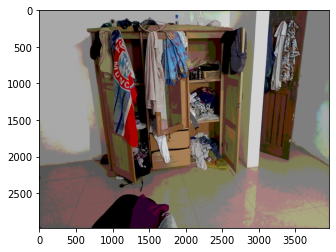

In [16]:
iu.display_image(dec)